This file is for Problem 1. First, we need to input our function and set up our variable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie
from numba import set_num_threads
from numba import jit, njit, prange

If one wants to really compare result of problem 1 and 2, one should not use numba(i.e. set nthreads=1). I will talk about it at the end.

In [2]:
nthreads = 12
set_num_threads(nthreads)

In [3]:
time = 0
num_particles = 100             #np.randam.normal(平均值，標準差，output樣式)
mass = np.full((num_particles,1),20/num_particles)      #np.fall(陣列大小，每一個數值為何)
position = np.random.normal(0,1,(num_particles,3))
velocity = np.random.normal(0,1,(num_particles,3))
accleration = np.random.normal(0,1,(num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

In [4]:
particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

after setting up, we can first test our result(at t=0):

In [5]:
particles.output(filename='data.txt')

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function setitem>) found for signature:
 
 >>> setitem(array(float64, 1d, C), int64, array(float64, 1d, C))
 
There are 16 candidate implementations:
[1m  - Of which 16 did not match due to:
  Overload of function 'setitem': File: <numerous>: Line N/A.
    With argument(s): '(array(float64, 1d, C), int64, array(float64, 1d, C))':[0m
[1m   No match.[0m
[0m
[0m[1mDuring: typing of setitem at c:\Users\User\code\HW2\nbodywork\particles.py (11)[0m
[1m
File "nbodywork\particles.py", line 11:[0m
[1mdef calculate_PE_kernel(nparticles,mass,position,G=0.1,rsoft=0.01):
    <source elided>
                r = np.sqrt(np.sum(rij**2) + rsoft**2)
[1m                pe[i] = pe[i] - G * mass[i] * mass[j] / (r)
[0m                [1m^[0m[0m


In [ ]:
time = 0
particles.draw(dim=3)

After we sure that our output is fine, we could start simulating:

In [ ]:
simulation = NBodySimulator(particles=particles)
simulation.setup(G=0.1, rsoft=0.01, method='rk2',outfreq=200)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = 0.01, tmax = 10.01)

finally, we can output our picture at time = 0,2,4,6,8,10:

In [ ]:
file_paths = [
    'data_nbody\\nbody_000000.dat',
    'data_nbody\\nbody_000200.dat',
    'data_nbody\\nbody_000400.dat',
    'data_nbody\\nbody_000600.dat',
    'data_nbody\\nbody_000800.dat',
    'data_nbody\\nbody_001000.dat'
]
#讀每個輸出檔，畫出位置散佈圖
for idx, file_path in enumerate(file_paths):

    data = np.loadtxt(file_path)
    positions_x = data[2,:]
    positions_y = data[3,:]
 
    plt.scatter(positions_x, positions_y, alpha=0.3, s=10)
    plt.xlabel('X [code unit]')
    plt.ylabel('Y [code unit]')
    plt.xlim(-30, 30) 
    plt.ylim(-30, 30) 
    plt.title(f'Particle Positions at t = {2*idx} seconds using RK2')  
    plt.show()

Now is for problem 2. This problem is just repeating problem 1 with our own leap frog method. We can compare the result...

In [ ]:
particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

In [ ]:
simulation = NBodySimulator(particles=particles)
simulation.setup(G=0.1, rsoft=0.01, method='frog',outfreq=200)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = 0.01, tmax = 10.01)

In [ ]:
file_paths = [
    'data_nbody\\nbody_000000.dat',
    'data_nbody\\nbody_000200.dat',
    'data_nbody\\nbody_000400.dat',
    'data_nbody\\nbody_000600.dat',
    'data_nbody\\nbody_000800.dat',
    'data_nbody\\nbody_001000.dat'
]
#讀每個輸出檔，畫出位置散佈圖
for idx, file_path in enumerate(file_paths):

    data = np.loadtxt(file_path)
    positions_x = data[2,:]
    positions_y = data[3,:]
 
    plt.scatter(positions_x, positions_y, alpha=0.3, s=10)
    plt.xlabel('X [code unit]')
    plt.ylabel('Y [code unit]')
    plt.xlim(-30, 30) 
    plt.ylim(-30, 30) 
    plt.title(f'Particle Positions at t = {2*idx} seconds using Leap Frog method')  
    plt.show()

which, we can see, are very difference from simulation using RK2 method.

However, I found a very intresting problem during doing homework. The problem is that when I use numba(nthreads>1), even though I am using the same method and same input, I will still got different result (one can try setting nthreads>1 and use RK2 method twice) . But when I set nthreads=1, this problem will vanished. I do not sure the reason behind this. Anyway, because of this problem, I will use nthreads=1 when I want to compare problem 1 and 2, which I can sure that the result diffrence is really because of the simulation method and is not by numba problem or something like that. 

Finally, for problem 3, I would first deal with the input and simulation again, and write down the function to calculate kinetic and potential energy(I will try to read the output file directly). After doiing all this, let's see the energy-time diagram using Euler method first:

In [ ]:
particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

In [ ]:
simulation = NBodySimulator(particles=particles)
simulation.setup(G=0.1, rsoft=0.01, method='euler',outfreq=200)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = 0.01, tmax = 10.01)

In [ ]:
file_paths = [
    'data_nbody\\nbody_000000.dat',
    'data_nbody\\nbody_000200.dat',
    'data_nbody\\nbody_000400.dat',
    'data_nbody\\nbody_000600.dat',
    'data_nbody\\nbody_000800.dat',
    'data_nbody\\nbody_001000.dat'
]

Total_Kinetic_Energy = np.zeros(len(file_paths))
Total_Potential_Energy = np.zeros(len(file_paths))
Total_Energy_Euler = np.zeros(len(file_paths))

for idx, file_path in enumerate(file_paths):
    data = np.loadtxt(file_path)
    Total_Kinetic_Energy[idx] = np.sum(data[11, :])
    Total_Potential_Energy[idx] = np.sum(data[12, :])
    Total_Energy_Euler[idx] = Total_Kinetic_Energy[idx] + Total_Potential_Energy[idx]

time = np.arange(0, len(file_paths) * 2, 2)

plt.plot(time, Total_Kinetic_Energy, color='red', label='Kinetic Energy')
plt.plot(time, Total_Potential_Energy, color='black', label='Potential Energy')
plt.plot(time, Total_Energy_Euler, color='blue', label='Total Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Time-Energy using euler')
plt.legend()
plt.show()
print(Total_Kinetic_Energy)
print(Total_Potential_Energy)
print(Total_Energy_Euler)

after euler, let's use RK2:

In [ ]:
particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

simulation = NBodySimulator(particles=particles)
simulation.setup(G=0.1, rsoft=0.01, method='rk2',outfreq=200)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = 0.01, tmax = 10.01)

file_paths = [
    'data_nbody\\nbody_000000.dat',
    'data_nbody\\nbody_000200.dat',
    'data_nbody\\nbody_000400.dat',
    'data_nbody\\nbody_000600.dat',
    'data_nbody\\nbody_000800.dat',
    'data_nbody\\nbody_001000.dat'
]

Total_Kinetic_Energy = np.zeros(len(file_paths))
Total_Potential_Energy = np.zeros(len(file_paths))
Total_Energy_RK2 = np.zeros(len(file_paths))

for idx, file_path in enumerate(file_paths):
    data = np.loadtxt(file_path)
    Total_Kinetic_Energy[idx] = np.sum(data[11, :])
    Total_Potential_Energy[idx] = np.sum(data[12, :])
    Total_Energy_RK2[idx] = Total_Kinetic_Energy[idx] + Total_Potential_Energy[idx]

time = np.arange(0, len(file_paths) * 2, 2)

plt.plot(time, Total_Kinetic_Energy, color='red', label='Kinetic Energy')
plt.plot(time, Total_Potential_Energy, color='black', label='Potential Energy')
plt.plot(time, Total_Energy_RK2, color='blue', label='Total Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Time-Energy using rk2')
plt.legend()
plt.show()
print(Total_Kinetic_Energy)
print(Total_Potential_Energy)
print(Total_Energy_RK2)

and, RK4:

In [ ]:
particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

simulation = NBodySimulator(particles=particles)
simulation.setup(G=0.1, rsoft=0.01, method='rk2',outfreq=200)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = 0.01, tmax = 10.01)

file_paths = [
    'data_nbody\\nbody_000000.dat',
    'data_nbody\\nbody_000200.dat',
    'data_nbody\\nbody_000400.dat',
    'data_nbody\\nbody_000600.dat',
    'data_nbody\\nbody_000800.dat',
    'data_nbody\\nbody_001000.dat'
]

Total_Kinetic_Energy = np.zeros(len(file_paths))
Total_Potential_Energy = np.zeros(len(file_paths))
Total_Energy_RK4 = np.zeros(len(file_paths))

for idx, file_path in enumerate(file_paths):
    data = np.loadtxt(file_path)
    Total_Kinetic_Energy[idx] = np.sum(data[11, :])
    Total_Potential_Energy[idx] = np.sum(data[12, :])
    Total_Energy_RK4[idx] = Total_Kinetic_Energy[idx] + Total_Potential_Energy[idx]

time = np.arange(0, len(file_paths) * 2, 2)

plt.plot(time, Total_Kinetic_Energy, color='red', label='Kinetic Energy')
plt.plot(time, Total_Potential_Energy, color='black', label='Potential Energy')
plt.plot(time, Total_Energy_RK4, color='blue', label='Total Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Time-Energy using rk4')
plt.legend()
plt.show()
print(Total_Kinetic_Energy)
print(Total_Potential_Energy)
print(Total_Energy_RK4)

finally, leap frog:

n 0 Time 0 dt: 0.01
n 20 Time 0.20000000000000004 dt: 0.01
n 40 Time 0.4000000000000002 dt: 0.01
n 60 Time 0.6000000000000003 dt: 0.01
n 80 Time 0.8000000000000005 dt: 0.01
n 100 Time 1.0000000000000007 dt: 0.01
n 120 Time 1.2000000000000008 dt: 0.01
n 140 Time 1.400000000000001 dt: 0.01
n 160 Time 1.6000000000000012 dt: 0.01
n 180 Time 1.8000000000000014 dt: 0.01
n 200 Time 2.0000000000000013 dt: 0.01
n 220 Time 2.199999999999997 dt: 0.01
n 240 Time 2.399999999999993 dt: 0.01
n 260 Time 2.5999999999999885 dt: 0.01
n 280 Time 2.7999999999999843 dt: 0.01
n 300 Time 2.99999999999998 dt: 0.01
n 320 Time 3.1999999999999758 dt: 0.01
n 340 Time 3.3999999999999715 dt: 0.01
n 360 Time 3.5999999999999672 dt: 0.01
n 380 Time 3.799999999999963 dt: 0.01
n 400 Time 3.9999999999999587 dt: 0.01
n 420 Time 4.199999999999955 dt: 0.01
n 440 Time 4.399999999999951 dt: 0.01
n 460 Time 4.599999999999946 dt: 0.01
n 480 Time 4.799999999999942 dt: 0.01
n 500 Time 4.999999999999938 dt: 0.01
n 520 Time 5.199999

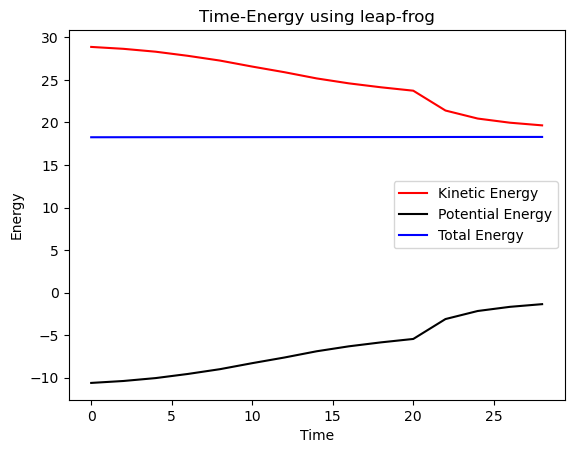

[28.88426787 28.66090892 28.32211756 27.83872734 27.27763408 26.57350759
 25.91150165 25.18121247 24.60087533 24.13647299 23.73778725 21.40589019
 20.46234404 19.97459738 19.6614041 ]
[-10.62067493 -10.39325496 -10.05266507  -9.56692603  -9.00331508
  -8.29712612  -7.6326706   -6.89968966  -6.31724551  -5.8509837
  -5.45096999  -3.11118535  -2.16423407  -1.67467326  -1.36036057]
[18.26359294 18.26765396 18.26945249 18.2718013  18.27431899 18.27638147
 18.27883106 18.28152281 18.28362983 18.28548928 18.28681726 18.29470484
 18.29810997 18.29992412 18.30104353]


In [ ]:
particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

simulation = NBodySimulator(particles=particles)
simulation.setup(G=0.1, rsoft=0.01, method='frog',outfreq=20)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = 0.01, tmax = 10.01)

file_paths = [
    'data_nbody\\nbody_000000.dat',
    'data_nbody\\nbody_000020.dat',
    'data_nbody\\nbody_000040.dat',
    'data_nbody\\nbody_000060.dat',
    'data_nbody\\nbody_000080.dat',
    'data_nbody\\nbody_000100.dat',
    'data_nbody\\nbody_000120.dat',
    'data_nbody\\nbody_000140.dat',
    'data_nbody\\nbody_000160.dat',
    'data_nbody\\nbody_000180.dat',
    'data_nbody\\nbody_000200.dat',
    'data_nbody\\nbody_000400.dat',
    'data_nbody\\nbody_000600.dat',
    'data_nbody\\nbody_000800.dat',
    'data_nbody\\nbody_001000.dat'
]

Total_Kinetic_Energy = np.zeros(len(file_paths))
Total_Potential_Energy = np.zeros(len(file_paths))
Total_Energy_Frog = np.zeros(len(file_paths))

for idx, file_path in enumerate(file_paths):
    data = np.loadtxt(file_path)
    Total_Kinetic_Energy[idx] = np.sum(data[11, :])
    Total_Potential_Energy[idx] = np.sum(data[12, :])
    Total_Energy_Frog[idx] = Total_Kinetic_Energy[idx] + Total_Potential_Energy[idx]

time = np.arange(0, len(file_paths) * 2, 2)

plt.plot(time, Total_Kinetic_Energy, color='red', label='Kinetic Energy')
plt.plot(time, Total_Potential_Energy, color='black', label='Potential Energy')
plt.plot(time, Total_Energy_Frog, color='blue', label='Total Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Time-Energy using leap-frog')
plt.legend()
plt.show()
print(Total_Kinetic_Energy)
print(Total_Potential_Energy)
print(Total_Energy_Frog)

I will also put all total energy in one picture:

In [ ]:
plt.plot(time, Total_Energy_Euler, color='red', label='Total Energy for Euler')
plt.plot(time, Total_Energy_RK2, color='blue', label='Total Energy for RK2')
plt.plot(time, Total_Energy_RK4, color='yellow', label='Total Energy for RK4')
plt.plot(time, Total_Energy_Frog, color='green', label='Total Energy for Leap-frog')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Time-Total Energy using diffrent method')
plt.legend()
plt.show()